># **Estimates Based on the Location**



In [5]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

data_file_path = './data/batting_stats_for_icc_mens_t20_world_cup_2024.csv'

In [6]:
data = pd.read_csv(data_file_path)
data.head()

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,NP Kenjige,United States of America,4,2,0,1,1,0.5,25.00,0,0,1
1,Aaron Jones,United States of America,6,6,2,162,94*,40.5,135.00,0,1,1
2,Aasif Sheikh,Nepal,3,3,0,63,42,21.0,88.73,0,0,0
3,Abbas Afridi,Pakistan,1,1,0,17,17,17.0,80.95,0,0,0
4,F Achelam,Uganda,1,1,0,9,9,9.0,69.23,0,0,0


In [7]:
print(data['Runs'].mean()), data.shape

49.149797570850204


(None, (247, 12))

In [8]:
print(trim_mean(data['Runs'], 0.1))

38.21608040201005


In [9]:
print(data['Runs'].median())

25.0


In [10]:
print(data['SR'].mean())

88.91178137651822


In [11]:
print(np.average(data['SR'], weights=data['Runs']))       # weighted mean with xi='SR' and weight='Runs'

120.19140774299835


In [12]:
print(wquantiles.median(data['SR'], weights=data['Runs']))

122.156


># **Estimates Based on the Variablity**



In [13]:
data.head(10)

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,NP Kenjige,United States of America,4,2,0,1,1,0.50,25.00,0,0,1
1,Aaron Jones,United States of America,6,6,2,162,94*,40.50,135.00,0,1,1
2,Aasif Sheikh,Nepal,3,3,0,63,42,21.00,88.73,0,0,0
3,Abbas Afridi,Pakistan,1,1,0,17,17,17.00,80.95,0,0,0
4,F Achelam,Uganda,1,1,0,9,9,9.00,69.23,0,0,0
5,MR Adair,Ireland,3,3,0,52,34,17.33,115.55,0,0,0
6,AC Agar,Australia,2,1,0,2,2,2.00,40.00,0,0,0
7,DS Airee,Nepal,3,3,0,32,25,10.66,66.66,0,0,0
8,MM Ali,England,8,5,0,71,25,14.20,139.21,0,0,0
9,Ali Khan,United States of America,6,2,1,14,14*,14.00,175.00,0,0,1


In [14]:
print(data['Runs'].std())

58.13725900062022


In [15]:
print(data['Runs'].quantile(0.75) - data['Runs'].quantile(0.25))      # IQR

63.0


In [16]:
print(robust.scale.mad(data['Runs']))

32.61724880712324


In [17]:
print(abs(data['Runs'] - data['Runs'].median()).median() / 0.6744897501960817)
# 0.6744897501960817 is approximately the median of the standard normal distribution

32.61724880712324


># **Estimates Based on the Percentiles**

In [18]:
print(data['Ave'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05     0.000
0.25     4.000
0.50    11.000
0.75    21.250
0.95    40.449
Name: Ave, dtype: float64


In [19]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data['Ave'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

     5.0%  25.0%  50.0%  75.0%   95.0%
Ave   0.0    4.0   11.0  21.25  40.449


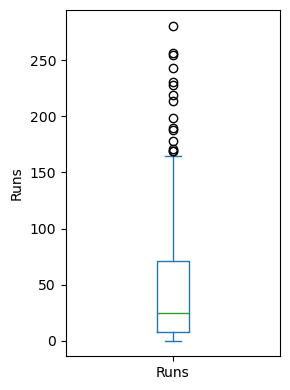

In [20]:
ax = (data['Runs']).plot.box(figsize=(3, 4))
ax.set_ylabel('Runs')

plt.tight_layout()
plt.show()

># **Data Distribution**


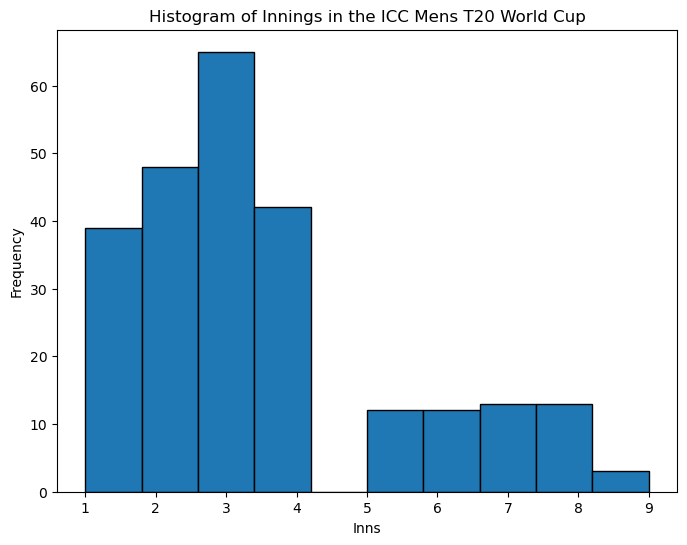

In [21]:
def plot_histogram(data, column_name, bins=10, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    plt.hist(data[column_name], bins=bins, edgecolor='black')
    plt.title(f'Histogram of Innings in the ICC Mens T20 World Cup')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(data, 'Inns')

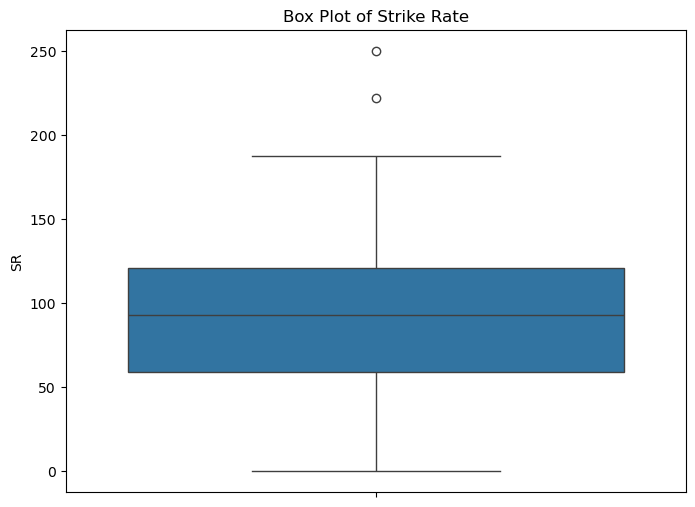

In [22]:
def plot_boxplot(data, column_name, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(y=data[column_name])
    plt.title(f'Box Plot of Strike Rate')
    plt.ylabel(column_name)
    plt.show()

plot_boxplot(data, 'SR')

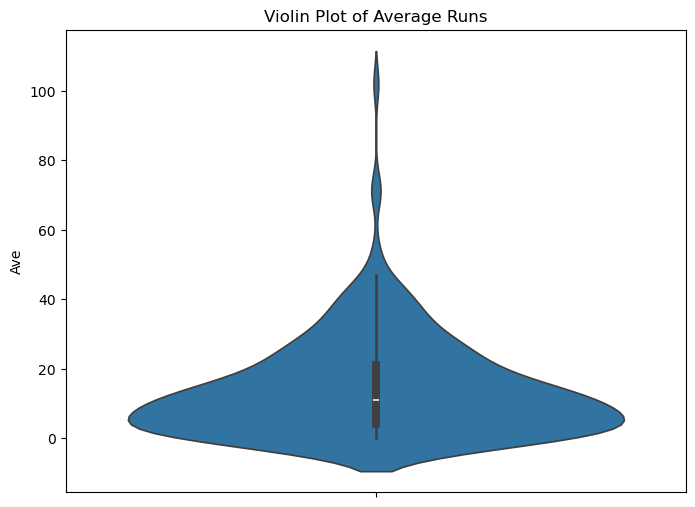

In [23]:
def plot_violinplot(data, column_name, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    sns.violinplot(y=data[column_name])
    plt.title(f'Violin Plot of Average Runs')
    plt.ylabel(column_name)
    plt.show()

plot_violinplot(data, 'Ave')

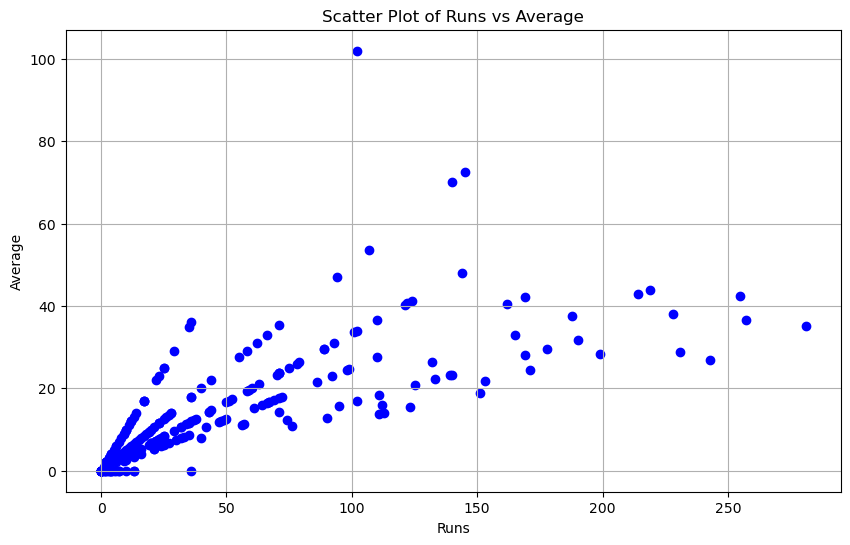

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Runs'], data['Ave'], color='blue')
plt.title('Scatter Plot of Runs vs Average')
plt.xlabel('Runs')
plt.ylabel('Average')
plt.grid(True)
plt.show()

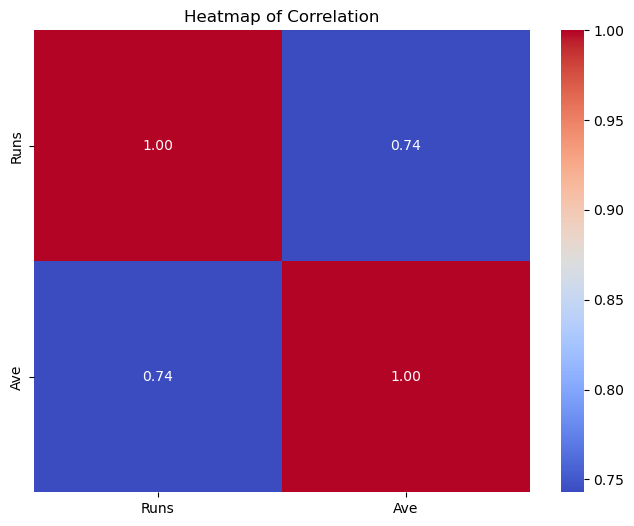

In [25]:
corr = data[['Runs', 'Ave']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation')
plt.show()

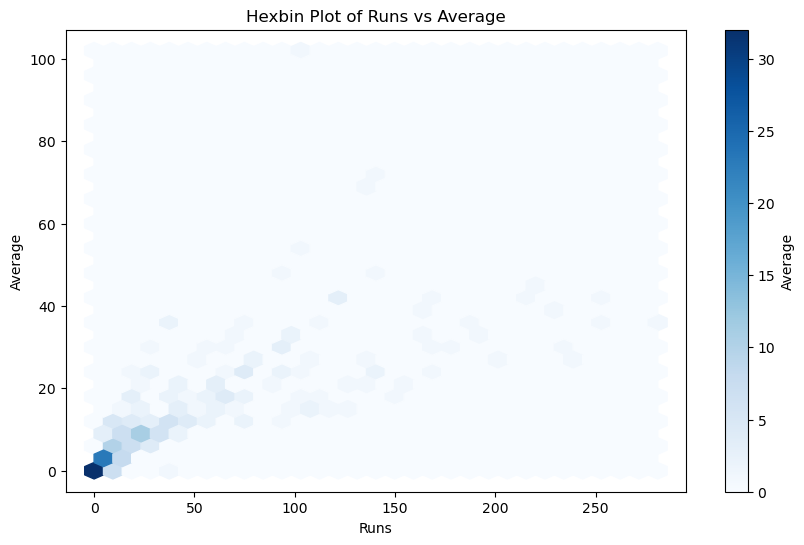

In [26]:
plt.figure(figsize=(10, 6))
plt.hexbin(data['Runs'], data['Ave'], gridsize=30, cmap='Blues', reduce_C_function=np.mean)
plt.colorbar(label='Average')
plt.title('Hexbin Plot of Runs vs Average')
plt.xlabel('Runs')
plt.ylabel('Average')
plt.show()

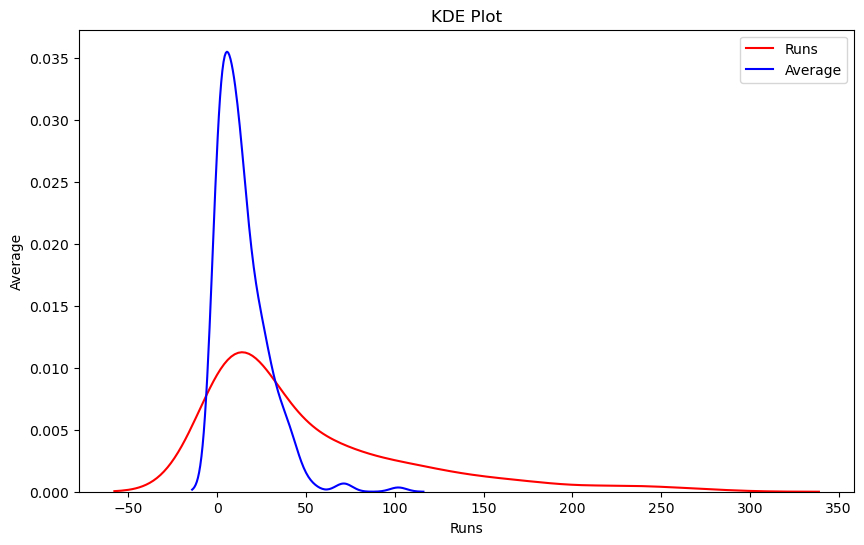

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Runs'], color='r', label='Runs')
sns.kdeplot(data['Ave'], color='b', label='Average')
plt.title('KDE Plot')
plt.xlabel('Runs')
plt.ylabel('Average')
plt.legend()
plt.show()


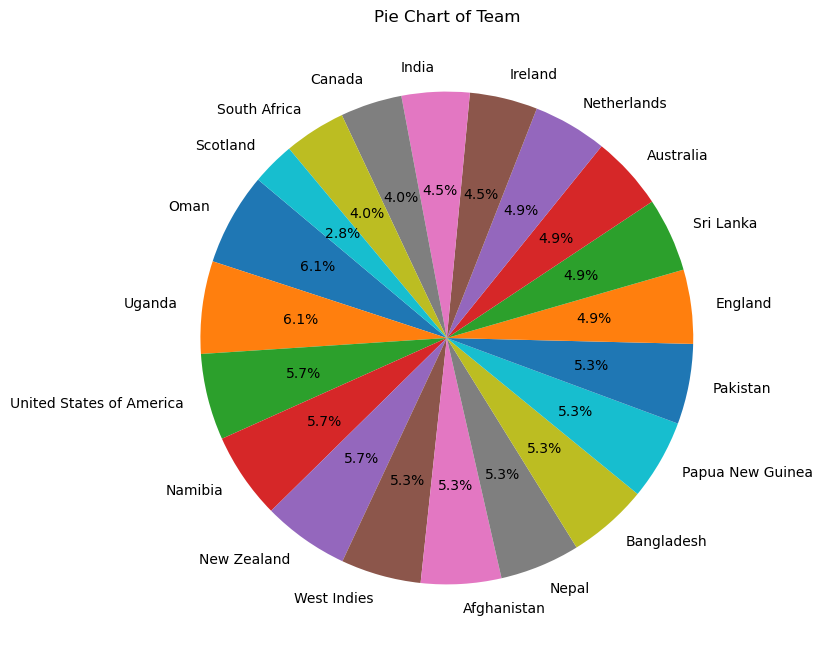

In [28]:
def plot_pie_chart(data, column_name, figsize=(8, 8)):
    counts = data[column_name].value_counts()
    plt.figure(figsize=figsize)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {column_name}')
    plt.show()

plot_pie_chart(data, 'Team')

># **Binary and Categorical Distribution**


In [29]:
print(data['Inns'].values.sum())

852


In [30]:
print(100 * data['Inns'] / data['Inns'].values.sum())

0      0.234742
1      0.704225
2      0.352113
3      0.117371
4      0.117371
         ...   
242    0.469484
243    0.352113
244    0.938967
245    0.117371
246    0.469484
Name: Inns, Length: 247, dtype: float64


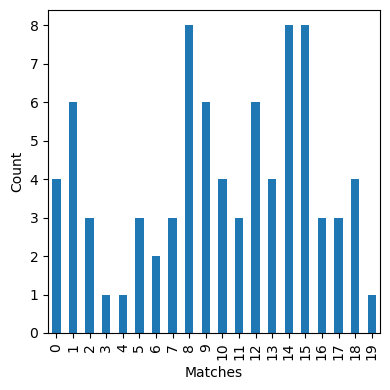

In [31]:
axis = data['Mat'].head(20).transpose().plot.bar(figsize=(4, 4), legend=False)
axis.set_xlabel('Matches')
axis.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [32]:
# Percentage distribution
print(data['Player'].value_counts(normalize=True) * 100)

# Would be more if there were duplicate values

Player
NP Kenjige         0.404858
JDS Neesham        0.404858
AT Nidamanuru      0.404858
P Nissanka         0.404858
Noor Ahmad         0.404858
                     ...   
Jaker Ali          0.404858
M Jansen           0.404858
Jasdeep Singh      0.404858
A Johnson          0.404858
Zeeshan Maqsood    0.404858
Name: proportion, Length: 247, dtype: float64


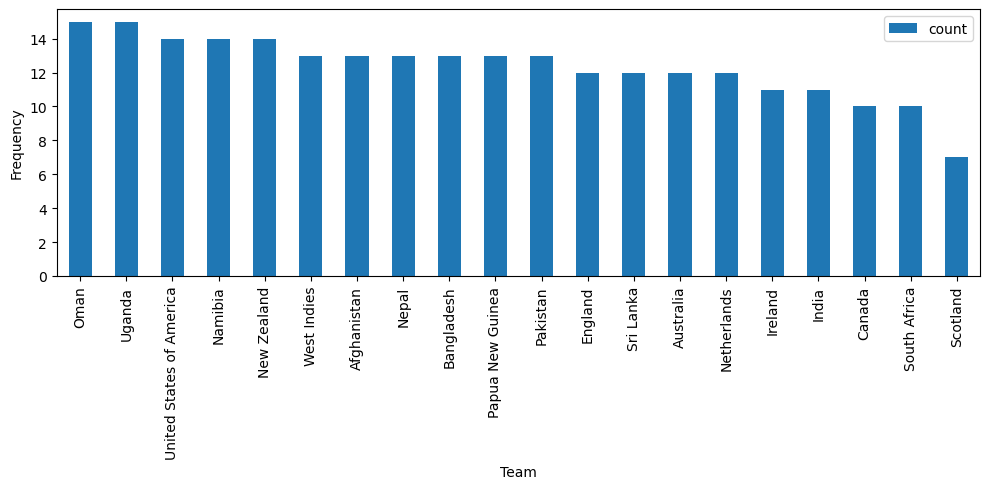

In [33]:
counts = data['Team'].value_counts()

# Plot
axis = counts.plot.bar(figsize=(10, 5), legend=True)
axis.set_xlabel('Team')
axis.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [34]:
data.columns

Index(['Player', 'Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'SR', '100',
       '50', '0'],
      dtype='object')

In [35]:
data.tail()

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
242,D Wiese,Namibia,4,4,1,51,27,17.00,127.50,0,0,0
243,KS Williamson,New Zealand,4,3,1,28,18*,14.00,87.50,0,0,0
244,SA Yadav,India,8,8,1,199,53,28.42,135.37,0,2,0
245,A Zampa,Australia,7,1,0,9,9,9.00,128.57,0,0,0
246,Zeeshan Maqsood,Oman,4,4,0,27,22,6.75,75.00,0,0,0


In [36]:
X = data.drop(['Player', 'Team', 'Runs'], axis=1)
y = data['Runs']
X.columns

Index(['Mat', 'Inns', 'NO', 'HS', 'Ave', 'SR', '100', '50', '0'], dtype='object')

In [37]:
X.head()

,Mat,Inns,NO,HS,Ave,SR,100,50,0
0,4,2,0,1,0.5,25.00,0,0,1
1,6,6,2,94*,40.5,135.00,0,1,1
2,3,3,0,42,21.0,88.73,0,0,0
3,1,1,0,17,17.0,80.95,0,0,0
4,1,1,0,9,9.0,69.23,0,0,0


In [38]:
y.head()

0      1
1    162
2     63
3     17
4      9
Name: Runs, dtype: int64

In [39]:
X['HS'] = X['HS'].astype(str).str.replace('*', '').astype("int8")

X['HS'].unique()

array([ 1, 94, 42, 17,  9, 34,  2, 25, 14, 26, 29, 18, 21, 46, 54, 41,  0,
       44, 48, 11, 50, 47, 13,  8,  7, 53, 83, 12,  4, 52, 35, 10, 24, 74,
       31, 61, 30, 27, 15, 40, 45, 80, 28, 49,  3, 38, 20,  5, 76, 43, 82,
       70,  6, 51, 22, 33, 37, 59, 19, 16, 98, 36, 68, 87, 23, 64, 92, 67,
       56], dtype=int8)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9172399536114489

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_pred, y_test)

print("Mean Squared error of the model - ", mse)
print("Coefficient of Determination of the data - ", r2s)

Mean Squared error of the model -  220.2982722972945
Coefficient of Determination of the data -  0.920908592161382


### **Cross Validataion**

In [42]:
from sklearn.model_selection import KFold,cross_val_score

kf = KFold(shuffle=True)
arr = cross_val_score(LinearRegression(), X, y, cv=kf)

arr, np.mean(arr)

(array([0.91764043, 0.93935024, 0.87014847, 0.90039286, 0.95414588]),
 0.9163355739465603)

In [43]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [44]:
import sklearn
sklearn.__version__

'1.6.1'